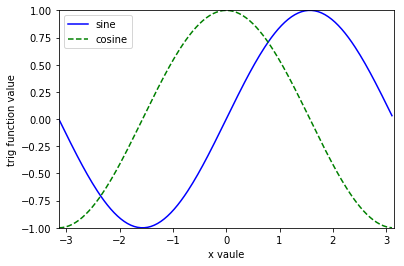

In [37]:
#PLOT SINE AND COSINE OVER THE RANGE{-PI,PI}
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-pi, pi, pi/100)
plt.plot(x, sin(x), 'b-', label='sine')
plt.plot(x, cos(x), 'g--', label='cosine')
plt.xlabel('x vaule')
plt.ylabel('trig function value')
plt.xlim(-pi, pi)
plt.ylim(-1,1)
plt.legend(loc='upper left')
plt.show()

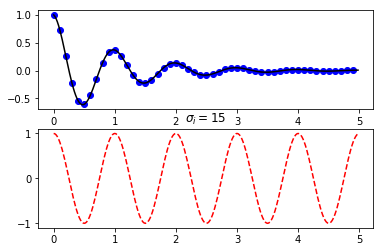

In [38]:
import numpy as np
import matplotlib.pyplot as plt


    
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.title(r'$\sigma_i=15$')
plt.show()

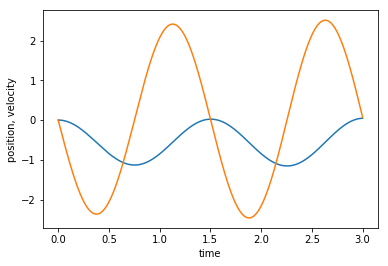

In [46]:
import matplotlib.pyplot as plt


N = 1000 #number of steps to take
Xo = 0.0 #intial position, spring unstreched
Vo = 0.0 #intial velocity
tau = 3.0 #total time for the simulation, in seconds
dt = tau/float(N/1) 
k = 3.5 #spring constant in N/m
m = 0.2 # mass, in kg
gravity = 9.8 # g, in m/s^2

#since we're plotting vs t, we need time for that plot 
time = linspace(0,tau,N)

'''Create a Nx2 array for soting the results of our calculations. Each 2
2-elemnt row will be used for the state of the system at one instance, and for
each instant is seperated by time dt. The first elemt
in each row will be position, th second velocity,'''

y= zeros([N,2])

y[0,0] = Xo
y[0,1] = Vo

def SHO(state, time):
    """This defines the differnetial equation we're sloving
    :dx^2/dt = -k/m x-g
    we break this second-order DE into two first-order DE by
    interducing v:
    dx/dt = v
    dc/dt = k/m * g"""
    
    g0 = state[1]
    g1 = -k/m * state[0] - gravity
    return array([g0, g1])
#now for the calculations
# loop only to N-1 sos that we don;t run into a 
#problem addressing y[N+1] on the last point
def euler(y, t, dt, derivs):
    """
    A routine that impliments Eulers method of finding the new state 
    of y, given the current state, time, and desired time step.
    derivs must be a function that returns the derivatives of y and thus 
    defines the differential equation
    
    """
    y_next = y + derivs(y,t) * dt
    return y_next
for j in range(N-1):
    y[j+1] = euler(y[j], time[j], dt, SHO)
#this next part will graph the results
#start by pulling out what we need from y
xdata = [y[j,0] for j in range(N)]
vdata = [y[j,1] for j in range(N)]

plt.plot(time, xdata)
plt.plot(time, vdata)
plt.xlabel("time")
plt.ylabel("position, velocity")
plt.show()
    
